## Тестовое задание на позицию Gambling Data Analyst

* [1.3.1 Task](#task1)
  * [Pandas realisation](#pd)
  * [PySpark realisation](#sp)
  * [SQL realisation](#sql)
* [1.3.2 Task](#task2)

## 1.3.1 Task
<a class='anchor' id='task1'></a>

Ожидаемый результат: сет player_id удовлетворяющий всем условиям вместе.

Условия:
* ставка сделана с 12:00 14.03.2022 в пре-матч
* все события в ставке из раздела «Киберспорт»
* минимальная сумма ставки 10 BYN
* коэффициент каждого события ставки не менее 1,5
* ставка должна быть рассчитана не позднее 12:00 15.03.2022
* ставки вида «система» не учитываются
* ставки CashOut, возвраты и FreeBet не учитываются


*Комментарий: поскольку в задании отсутствует описание полей, фильтрация может быть не совсем той, которая была заложена. Все шаги подписаны, фильтры обозначены, поэтому общая логика выполнения задания должна быть понятна.*

### Pandas realisation
<a class='anchor' id='pd'></a>

#### Bets dataframe

In [ ]:
# импорт библиотек
import pandas as pd

In [ ]:
# отображение всех колонок
pd.set_option('display.max_columns', None)

In [ ]:
# загрузка данных о ставках
bets_p = pd.read_csv('bets.csv')

# вывод структуры данных
bets_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102860 entries, 0 to 102859
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bet_id             102860 non-null  object 
 1   player_id          102860 non-null  object 
 2   accept_time        102860 non-null  object 
 3   create_time        102860 non-null  object 
 4   settlement_time    80379 non-null   object 
 5   result             80379 non-null   object 
 6   amount             102860 non-null  float64
 7   payout             80379 non-null   float64
 8   profit             80379 non-null   float64
 9   bet_type           102860 non-null  object 
 10  bet_size           102860 non-null  int64  
 11  accepted_bet_odd   102860 non-null  float64
 12  item_result        80379 non-null   object 
 13  event_stage        102165 non-null  object 
 14  accepted_odd       102860 non-null  float64
 15  item_amount        102860 non-null  float64
 16  it

In [ ]:
# вывод данных
bets_p.head()

,bet_id,player_id,accept_time,create_time,settlement_time,result,amount,payout,profit,bet_type,bet_size,accepted_bet_odd,item_result,event_stage,accepted_odd,item_amount,item_payout,item_profit,event_id,is_free_bet,settlement_status
0,4580f660-d16a-4ad6-8837-47574564a37f,cf928a91-a17d-42cd-8924-7c3fccd54acb,2022-03-14 00:00:00.165,2022-03-13 23:59:54.503,2022-03-14 00:21:59.745,Return,1.00,1.00,0.00,Ordinar,1,7.50,Return,Live,7.50,1.00,1.00,0.00,c3929913-1eef-4703-ada2-fe08fd47c79d,False,Settled
1,7435c382-e448-4c0b-8b56-a9e547ca6605,cf928a91-a17d-42cd-8924-7c3fccd54acb,2022-03-14 00:00:36.819,2022-03-14 00:00:31.160,2022-03-14 00:10:16.243,Win,0.95,2.48,-1.53,Ordinar,1,2.62,Win,Live,2.62,0.95,2.48,-1.53,c3929913-1eef-4703-ada2-fe08fd47c79d,False,Settled
2,ae36ffa2-0bb5-4bd7-8cf6-e15416ae4fc7,f1866879-4b0f-4a58-aaa9-24e6224cb139,2022-03-14 00:01:07.941,2022-03-14 00:01:07.743,2022-03-14 04:37:24.291,Win,3.51,7.51,-4.00,Ordinar,1,2.14,Win,Prematch,2.14,3.51,7.51,-4.00,7b6aaa15-3b2e-4977-8b1a-59472eeb0817,False,Settled
3,57009dc1-60c5-46f7-acb5-1a45a19983b7,e5efcd9c-aa46-48a1-be0e-9e9f9aa37b53,2022-03-14 00:01:27.927,2022-03-14 00:01:27.927,NaN,NaN,1.00,NaN,NaN,Express,4,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0b912707-3b87-4ec3-886c-2b0f96303977,False,Rejected
4,57009dc1-60c5-46f7-acb5-1a45a19983b7,e5efcd9c-aa46-48a1-be0e-9e9f9aa37b53,2022-03-14 00:01:27.927,2022-03-14 00:01:27.927,NaN,NaN,1.00,NaN,NaN,Express,4,0.00,NaN,NaN,0.00,0.00,NaN,NaN,c3929913-1eef-4703-ada2-fe08fd47c79d,False,Rejected


In [ ]:
# вывод уникальных значений 'bet_type', чтобы определить наименование для системных ставок
bets_p['bet_type'].unique()

array(['Ordinar', 'Express', 'System'], dtype=object)

In [ ]:
# вывод уникальных значений 'result', чтобы определить наименования для искомых типов ставок
bets_p['result'].unique()

array(['Return', 'Win', nan, 'Lose', 'Cashout', 'TechnicalReturn'],
      dtype=object)

In [ ]:
# фильтрация данных со ставками
bets_p = bets_p.loc[
    (bets_p['create_time'] >= '2022-03-14 12:00:00') # ставка сделана с 12:00 14.03.2022
    & (bets_p['event_stage'] == 'Prematch') # ставка сделана в пре-матч
    & (bets_p['amount'] >= 10) # минимальная сумма ставки 10 BYN
    & (bets_p['accepted_bet_odd'] >= 1.5) # коэффициент каждого события ставки не менее 1,5
    & (bets_p['settlement_time'] <= '2022-03-15 12:00:00') # ставка должна быть рассчитана не позднее 12:00 15.03.2022
    & (bets_p['bet_type'] != 'System') # ставки вида «система» не учитываются
    & ~bets_p.result.isin(['Cashout', 'TechnicalReturn', 'Return']) # ставки CashOut, возвраты и FreeBet не учитываются
    ]

In [ ]:
# проверка на пустые значения в колонках
bets_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 15305 to 63347
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bet_id             1245 non-null   object 
 1   player_id          1245 non-null   object 
 2   accept_time        1245 non-null   object 
 3   create_time        1245 non-null   object 
 4   settlement_time    1245 non-null   object 
 5   result             1245 non-null   object 
 6   amount             1245 non-null   float64
 7   payout             1245 non-null   float64
 8   profit             1245 non-null   float64
 9   bet_type           1245 non-null   object 
 10  bet_size           1245 non-null   int64  
 11  accepted_bet_odd   1245 non-null   float64
 12  item_result        1245 non-null   object 
 13  event_stage        1245 non-null   object 
 14  accepted_odd       1245 non-null   float64
 15  item_amount        1245 non-null   float64
 16  item_payout        1245 

#### Events dataframe

In [ ]:
# загрузка данных о событиях
events_p = pd.read_csv('events.csv')

# вывод структуры данных
events_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   event_id  3680 non-null   object
 1   sport     3680 non-null   object
 2   category  3680 non-null   object
 3   event     3680 non-null   object
dtypes: object(4)
memory usage: 115.1+ KB


In [ ]:
# вывод данных
events_p.head()

,event_id,sport,category,event
0,101dd0bf-449d-4c8c-b088-db1ef7f3f708,Football,Belgium,Anderlecht U-21 - Royal Antwerp U-21
1,ef534a8d-76f2-482f-bc09-b06a76921dc6,Football,Belgium,KMSK Deinze U-21 - Eupen U-21
2,9443dc96-f46a-447f-895b-1aa970299377,Handball,Russia,Zvezda Zvenihorod (w) - Kuban Krasnodar (w)
3,984ddbe0-e9dc-4cb6-b121-2118c859723e,Ice Hockey,Germany,Straubing Tigers - EHC Red Bull Munchen
4,bbe2dd93-e16e-4834-b5bc-691ed318ddde,Football,South America,General Caballero JLM - Sol de America


In [ ]:
# вывод уникальных значений 'sport', чтобы определить наименование для киберспорта
events_p['sport'].unique()

array(['Football', 'Handball', 'Ice Hockey', 'UFC', 'Volleyball',
       'Basketball', 'E-Sports', 'Cricket', 'Waterpolo', 'Tennis',
       'Table Tennis', 'Bandy', 'Futsal', 'Baseball'], dtype=object)

In [ ]:
# фильтрация данных с событиями
events_p = events_p.loc[events_p['sport'] == 'E-Sports'] # все события в ставке из раздела «Киберспорт»

#### Join events & bets dataframes

In [ ]:
# определяем ставки только для киберспортивных событий через inner join
df_p = events_p.merge(bets_p, on='event_id', how='inner')

In [ ]:
# сохранение уникальных player_id
players_p = df_p['player_id'].drop_duplicates()

In [ ]:
# вывод уникальных player_id
players_p

,player_id
0,091b1ffd-0e79-4f8f-b5fd-62e5e5f8f90a
1,e4898b8d-5240-474d-9ee6-a36b6d9a1eb9
5,e5d708d5-a7a1-43f2-a388-c0e9fb86595f
7,e16c4236-27f0-4300-9347-c74a1c7fca9e
8,d70c6ac8-b60f-4a5e-b297-231a49fe974b
10,19beb9ec-9a6a-40b5-b342-f3502e857096
12,58c5782f-3a99-4e60-a1d1-00e85c983abc
20,a2061870-2f00-40e4-bd05-df90d25a2fe1
28,4a8b72de-b3d2-4786-9a92-9dbddaa70137


In [ ]:
# сохранение уникальных player_id
players_p.to_csv('players_p.csv')

### PySpark realisation
<a class='anchor' id='sp'></a>

In [ ]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=d9494c896b1df38815d383216a71dd20571e753c53cca54cc714b7dfba64c903
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
# импорт библиотек
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [ ]:
# создание сессии
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

#### Bets dataframe

In [ ]:
# загрузка данных о ставках
bets_s = spark.read.csv(
    'bets.csv',
    header=True,
    inferSchema=True
    )

# вывод структуры данных
bets_s.printSchema()

root
 |-- bet_id: string (nullable = true)
 |-- player_id: string (nullable = true)
 |-- accept_time: timestamp (nullable = true)
 |-- create_time: timestamp (nullable = true)
 |-- settlement_time: timestamp (nullable = true)
 |-- result: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- payout: double (nullable = true)
 |-- profit: double (nullable = true)
 |-- bet_type: string (nullable = true)
 |-- bet_size: integer (nullable = true)
 |-- accepted_bet_odd: double (nullable = true)
 |-- item_result: string (nullable = true)
 |-- event_stage: string (nullable = true)
 |-- accepted_odd: double (nullable = true)
 |-- item_amount: double (nullable = true)
 |-- item_payout: double (nullable = true)
 |-- item_profit: double (nullable = true)
 |-- event_id: string (nullable = true)
 |-- is_free_bet: boolean (nullable = true)
 |-- settlement_status: string (nullable = true)



In [ ]:
# вывод данных
bets_s.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------+------+------+------+--------+--------+----------------+-----------+-----------+------------+-----------+-----------+-----------+--------------------+-----------+-----------------+
|              bet_id|           player_id|         accept_time|         create_time|     settlement_time| result|amount|payout|profit|bet_type|bet_size|accepted_bet_odd|item_result|event_stage|accepted_odd|item_amount|item_payout|item_profit|            event_id|is_free_bet|settlement_status|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------+------+------+------+--------+--------+----------------+-----------+-----------+------------+-----------+-----------+-----------+--------------------+-----------+-----------------+
|4580f660-d16a-4ad...|cf928a91-a17d-42c...|2022-03-14 00:00:...|2022-03-13 23:59:...|2022-03-14 00:21:...| Return| 

In [ ]:
# количество строк
bets_s.count()

102860

In [ ]:
# вывод уникальных значений 'bet_type', чтобы определить наименование для системных ставок
bets_s.dropDuplicates(['bet_type']).select('bet_type').show(truncate=False)

+--------+
|bet_type|
+--------+
|Express |
|Ordinar |
|System  |
+--------+



In [ ]:
# вывод уникальных значений 'result', чтобы определить наименования для искомых типов ставок
bets_s.dropDuplicates(['result']).select('result').show(truncate=False)

+---------------+
|result         |
+---------------+
|Win            |
|Cashout        |
|TechnicalReturn|
|Return         |
|Lose           |
|NULL           |
+---------------+



In [ ]:
# фильтрация данных со ставками
bets_s = bets_s.filter(
    (col('create_time') >= lit('2022-03-14 12:00:00')) # ставка сделана с 12:00 14.03.2022
    & (col('event_stage') == lit('Prematch')) # ставка сделана в пре-матч
    & (col('amount') >= lit(10)) # минимальная сумма ставки 10 BYN
    & (col('accepted_bet_odd') >= lit(1.5)) # коэффициент каждого события ставки не менее 1,5
    & (col('settlement_time') <= lit('2022-03-15 12:00:00')) # ставка должна быть рассчитана не позднее 12:00 15.03.2022
    & (col('bet_type') != lit('System')) # ставки вида «система» не учитываются
    & ~bets_s.result.isin(['Cashout', 'TechnicalReturn', 'Return']) # ставки CashOut, возвраты и FreeBet не учитываются
    )

In [ ]:
# проверка на пустые значения в колонках
{col:bets_s.filter(bets_s[col].isNull()).count() for col in bets_s.columns}

{'bet_id': 0,
 'player_id': 0,
 'accept_time': 0,
 'create_time': 0,
 'settlement_time': 0,
 'result': 0,
 'amount': 0,
 'payout': 0,
 'profit': 0,
 'bet_type': 0,
 'bet_size': 0,
 'accepted_bet_odd': 0,
 'item_result': 0,
 'event_stage': 0,
 'accepted_odd': 0,
 'item_amount': 0,
 'item_payout': 0,
 'item_profit': 0,
 'event_id': 0,
 'is_free_bet': 0,
 'settlement_status': 0}

#### Events dataframe

In [ ]:
# загрузка данных о событиях
events_s = spark.read.csv(
    'events.csv',
    header=True,
    inferSchema=True
    )

# вывод структуры данных
events_s.printSchema()

root
 |-- event_id: string (nullable = true)
 |-- sport: string (nullable = true)
 |-- category: string (nullable = true)
 |-- event: string (nullable = true)



In [ ]:
# вывод данных
events_s.show()

+--------------------+----------+--------------+--------------------+
|            event_id|     sport|      category|               event|
+--------------------+----------+--------------+--------------------+
|101dd0bf-449d-4c8...|  Football|       Belgium|Anderlecht U-21 -...|
|ef534a8d-76f2-482...|  Football|       Belgium|KMSK Deinze U-21 ...|
|9443dc96-f46a-447...|  Handball|        Russia|Zvezda Zvenihorod...|
|984ddbe0-e9dc-4cb...|Ice Hockey|       Germany|Straubing Tigers ...|
|bbe2dd93-e16e-483...|  Football| South America|General Caballero...|
|f6347734-1910-4d5...|Ice Hockey|       Finland|Kajaanin Hokki - ...|
|127b33a4-0877-417...|Ice Hockey|       Finland|TUTO Hockey Oy - ...|
|52c4eb41-8923-4ac...|       UFC|         Event|Askar Askarov - K...|
|171a4eec-7e80-4ae...|  Football|     Argentina|Arsenal Sarandi -...|
|15adbba2-c0fc-478...|Volleyball|        Russia|   Dynamo LR - Fakel|
|5226cb22-e527-40a...|Basketball|        Europe|BK Ventspils - Li...|
|331f01d5-cb53-442..

In [ ]:
# количество строк
events_s.count()

3680

In [ ]:
# вывод уникальных значений 'sport', чтобы определить наименование для киберспорта
events_s.dropDuplicates(['sport']).select('sport').show(truncate=False)

+------------+
|sport       |
+------------+
|Tennis      |
|Ice Hockey  |
|Basketball  |
|Handball    |
|UFC         |
|Futsal      |
|Bandy       |
|E-Sports    |
|Table Tennis|
|Waterpolo   |
|Baseball    |
|Cricket     |
|Volleyball  |
|Football    |
+------------+



In [ ]:
# фильтрация данных с событиями
events_s = events_s.filter(col('sport') == lit('E-Sports')) # все события в ставке из раздела «Киберспорт»

#### Join events & bets dataframes

In [ ]:
# определяем ставки только для киберспортивных событий через inner join
df_s = events_s.join(bets_s, on='event_id', how='inner').select('*')

In [ ]:
# сохранение уникальных player_id
players_s = df_s.dropDuplicates(['player_id']).select('player_id')

In [ ]:
# вывод уникальных player_id
players_s.show(truncate=False)

+------------------------------------+
|player_id                           |
+------------------------------------+
|a2061870-2f00-40e4-bd05-df90d25a2fe1|
|19beb9ec-9a6a-40b5-b342-f3502e857096|
|e16c4236-27f0-4300-9347-c74a1c7fca9e|
|58c5782f-3a99-4e60-a1d1-00e85c983abc|
|091b1ffd-0e79-4f8f-b5fd-62e5e5f8f90a|
|e4898b8d-5240-474d-9ee6-a36b6d9a1eb9|
|d70c6ac8-b60f-4a5e-b297-231a49fe974b|
|e5d708d5-a7a1-43f2-a388-c0e9fb86595f|
|4a8b72de-b3d2-4786-9a92-9dbddaa70137|
+------------------------------------+



In [ ]:
# сохранение уникальных player_id
players_s.write.csv('players_spark.csv')

### SQL realisation
<a class='anchor' id='sql'></a>

```
SELECT DISTINCT b.player_id

FROM base.bets AS b

-- все события в ставке из раздела «Киберспорт»
INNER JOIN base.events AS e
ON b.event_id = e.event_id
AND e.sport = 'E-Sports'

WHERE b.create_time >= '2022-03-14 12:00:00' -- ставка сделана с 12:00 14.03.2022
AND b.event_stage = 'Prematch' -- ставка сделана в пре-матч
AND b.amount >= 10 -- минимальная сумма ставки 10 BYN
AND b.accepted_bet_odd >= 1.5 -- коэффициент каждого события ставки не менее 1,5
AND b.settlement_time <= '2022-03-15 12:00:00' -- ставка должна быть рассчитана не позднее 12:00 15.03.2022
AND b.bet_type <> 'System' -- ставки вида «система» не учитываются
AND b.result NOT IN ('Cashout', 'TechnicalReturn', 'Return') -- ставки CashOut, возвраты и FreeBet не учитываются

```



## 1.3.2 Task
<a class='anchor' id='task2'></a>

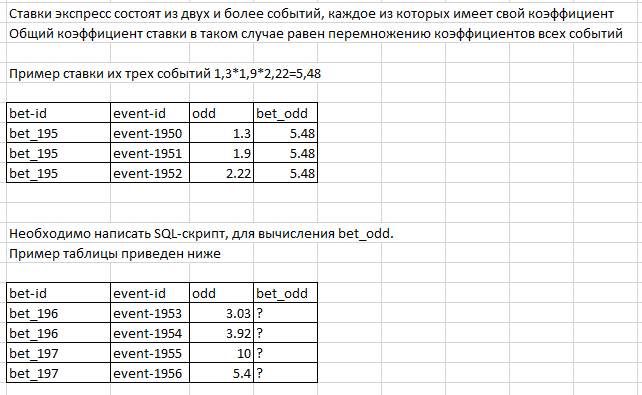


```
-- в SQL отсутствует функция для перемножения значений внутри одного поля.
-- для этой задачи можно использовать свойство логарифмов: логарифм произведения равен сумме логарифмов.
-- !! код написан для среды Teradata.
-- функция LOG() в этой среде не имеет возможности изменить основание логарифма, оно равно 10

WITH raw AS (-- сбор сырых данных
			SELECT  bet_id,
                    event_id,

					-- замена пропусков на нули для дальнейшей фильтрации
          -- (особенность совместимости фильтрации пустых значений и LOG() в Teradata)
                    CASE
                        WHEN odd IS NULL THEN 0
                        ELSE odd
                    END AS odd,

                    SUM(CASE WHEN odd < 0 THEN 1 ELSE 0 END) OVER(PARTITION BY bet_id) AS neg, -- количество отрицательных значений
                    SUM(CASE WHEN odd > 0 THEN 1 ELSE 0 END) OVER(PARTITION BY bet_id) AS pos, -- количество положительных значений
                    SUM(CASE WHEN odd <> 0 THEN 1 ELSE 0 END) OVER(PARTITION BY bet_id) AS total -- общее количество значений без нулей

            FROM base.bets AS b
            ),

res AS (-- сбор общего коэффициента для всех событий каждой ставки
		SELECT  bet_id,
				-- возведение коэффициента в модуль
				-- логарифм модуля числа делится на логарифм экспоненты единицы, чтобы рассчитать натуральный логарифм каждого коэффицента
				-- сложение всех натуральных логарифмов
				-- получение экспоненты из суммы
				-- умножение полученного результата на 1 или -1, чтобы получить общий коэффициент с нужным знаком
				-- поскольку в других средах функция LOG() - это натуральный логарифм, либо в этой функции можно настроить основание логарифма,
				-- то это могло бы выглядеть примерно так: EXP(SUM(LOG(ABS(odd)))) * MAX(even_odd)
				EXP(SUM(LOG(ABS(odd)) / LOG(EXP(1)))) * MAX(even_odd) AS bet_odd

		FROM (-- определение знака общего коэффициента для всех событий каждой ставки
				SELECT  bet_id,
				        odd,
				        
				        CASE
				            WHEN neg MOD 2 = 0 THEN 1 -- если количество отрицательных чисел чётное, то выведи 1
                                                      --(в иной среде можно использовать % вместо MOD или функцию MOD())
				            ELSE -1 -- если количество отрицательных чисел нечётное, то выведи -1
				        END AS even_odd
				                
				FROM raw

				-- нулевые коэффициенты не учитываются
				WHERE odd <> 0) AS a

		-- группировка на уровне ставки
		GROUP BY bet_id)

-- вывод набора данных
SELECT  raw.bet_id,
        raw.event_id,
        raw.odd,

		-- если для bet_odd значение не определено, то все коэффициенты ставки равны нулю или не были указаны
        CASE
			WHEN res.bet_odd IS NULL THEN 0
			ELSE res.bet_odd
		END AS bet_odd
        
FROM raw

-- добавление общего коэффициента для всех событий каждой ставки к сырым данным
LEFT JOIN res
ON raw.bet_id = res.bet_id
```